In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 1399s 8us/step


(50000, 32, 32, 3)

In [8]:
X_test.shape
#3 channel image(R,G,B) and size of 32*32

(10000, 32, 32, 3)

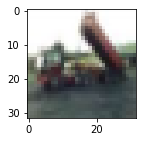

In [13]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[2])

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
#it's a 2D array and we simply need a 1D array
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [48]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
classes[3]

'cat'

In [20]:
def plotsample(X,y,index):
    plt.figure(figsize=(5,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

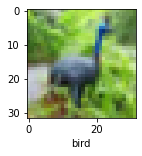

In [22]:
plotsample(X_train,y_train,6)

In [24]:
X_train = X_train/255

In [25]:
X_test=X_test/255

In [29]:
cnn=models.Sequential([
    #convolutional layers
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4564 - accuracy: 0.4760
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1044 - accuracy: 0.6147
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9775 - accuracy: 0.6625
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8896 - accuracy: 0.6935
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8234 - accuracy: 0.7146
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7657 - accuracy: 0.7355
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7176 - accuracy: 0.7512
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6711 - accuracy: 0.7677
Epoch 9/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6308 - accuracy: 0.7783
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9024 - accuracy: 0.7055


[0.9024176001548767, 0.7055000066757202]

In [36]:
y_test=y_test.reshape(-1,)

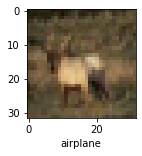

In [47]:
plotsample(X_test,y_test,3)

In [38]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.68968423e-03, 5.33607681e-06, 1.38687296e-03, 7.49364018e-01,
        4.00065728e-05, 2.28543326e-01, 1.84536483e-02, 2.55199557e-04,
        1.87269092e-04, 7.46026853e-05],
       [7.07539776e-03, 3.12405173e-02, 1.26896254e-07, 7.14718524e-08,
        4.58030094e-08, 4.91188618e-11, 2.35735929e-08, 2.65496336e-08,
        9.61663306e-01, 2.05614797e-05],
       [9.10202414e-02, 1.93256304e-01, 7.54449749e-03, 2.75094640e-02,
        1.02079380e-02, 1.29743596e-03, 3.76076135e-03, 1.99113577e-03,
        6.25525832e-01, 3.78864110e-02],
       [9.80225027e-01, 9.43496525e-06, 2.29325867e-03, 3.76048447e-05,
        4.00079181e-03, 4.87080433e-06, 1.40619977e-05, 1.61813645e-04,
        1.32448114e-02, 8.29926194e-06],
       [1.07266615e-05, 1.27414518e-04, 2.65035126e-02, 1.60359796e-02,
        2.26474091e-01, 7.52846943e-04, 7.29938388e-01, 1.40995201e-06,
        1.55186615e-04, 5.07737127e-07]], dtype=float32)

In [39]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [44]:
classes[y_classes[3]]

'airplane'

In [52]:
from sklearn.metrics import classification_report
print("Classification report: \n",classification_report(y_test,y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.81      0.74      1000
           1       0.81      0.83      0.82      1000
           2       0.57      0.60      0.59      1000
           3       0.52      0.52      0.52      1000
           4       0.70      0.58      0.64      1000
           5       0.68      0.52      0.59      1000
           6       0.73      0.81      0.76      1000
           7       0.71      0.79      0.75      1000
           8       0.83      0.80      0.82      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

